In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
import keras

In [3]:
# This returns a tensor
inputs = Input(shape=(784,))

In [4]:
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'engine',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

### ker

In [5]:
from keras import optimizers

In [6]:
optimizers.SGD(lr=0.01)

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

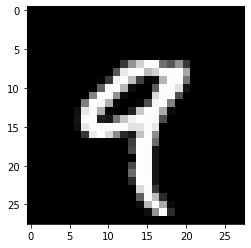

In [10]:
import matplotlib.pyplot as plt
im = plt.imshow(x_train[4],cmap='gray')
plt.show()

In [11]:
y_train[4]

9

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

In [14]:
x_test = x_test/255
x_train = x_train/255

y进行独热编码5-》[0,0,0,0,0,1,0,0,0,0]

In [15]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

初始化数据处理完毕，开始进行训练模型

In [17]:
x_test.shape

(10000, 784)

In [18]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [22]:
model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 58s 968us/step - loss: 0.7712 - accuracy: 0.8177 - val_loss: 0.3754 - val_accuracy: 0.8992
Epoch 2/5
60000/60000 [==============================] - 58s 967us/step - loss: 0.3392 - accuracy: 0.9057 - val_loss: 0.2882 - val_accuracy: 0.9199
Epoch 3/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2824 - accuracy: 0.9201 - val_loss: 0.2563 - val_accuracy: 0.9267
Epoch 4/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2493 - accuracy: 0.9296 - val_loss: 0.2280 - val_accuracy: 0.9354
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2247 - accuracy: 0.9371 - val_loss: 0.2121 - val_accuracy: 0.9388


In [23]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 8s 823us/step


In [24]:
score

[0.2121052961140871, 0.9387999773025513]

In [25]:
print('LOSS',score[0])
print('ACCU',score[1])

LOSS 0.2121052961140871
ACCU 0.9387999773025513


In [26]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

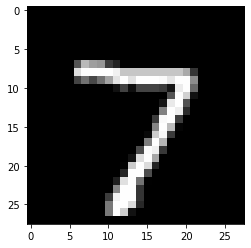

In [31]:
import matplotlib.pyplot as plt
im = plt.imshow(x_test[0].reshape(28,28),cmap='gray')
plt.show()